<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter17/SDXL-Turbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip -q install diffusers accelerate torch-snippets torchinfo lovely_tensors

In [ ]:
from diffusers import DiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Define the Stable Diffusion XL pipeline
pipeline = DiffusionPipeline.from_pretrained( "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, )
# Set the device for the pipeline
pipeline = pipeline.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 35.9 s, sys: 7.51 s, total: 43.4 s
Wall time: 45 s


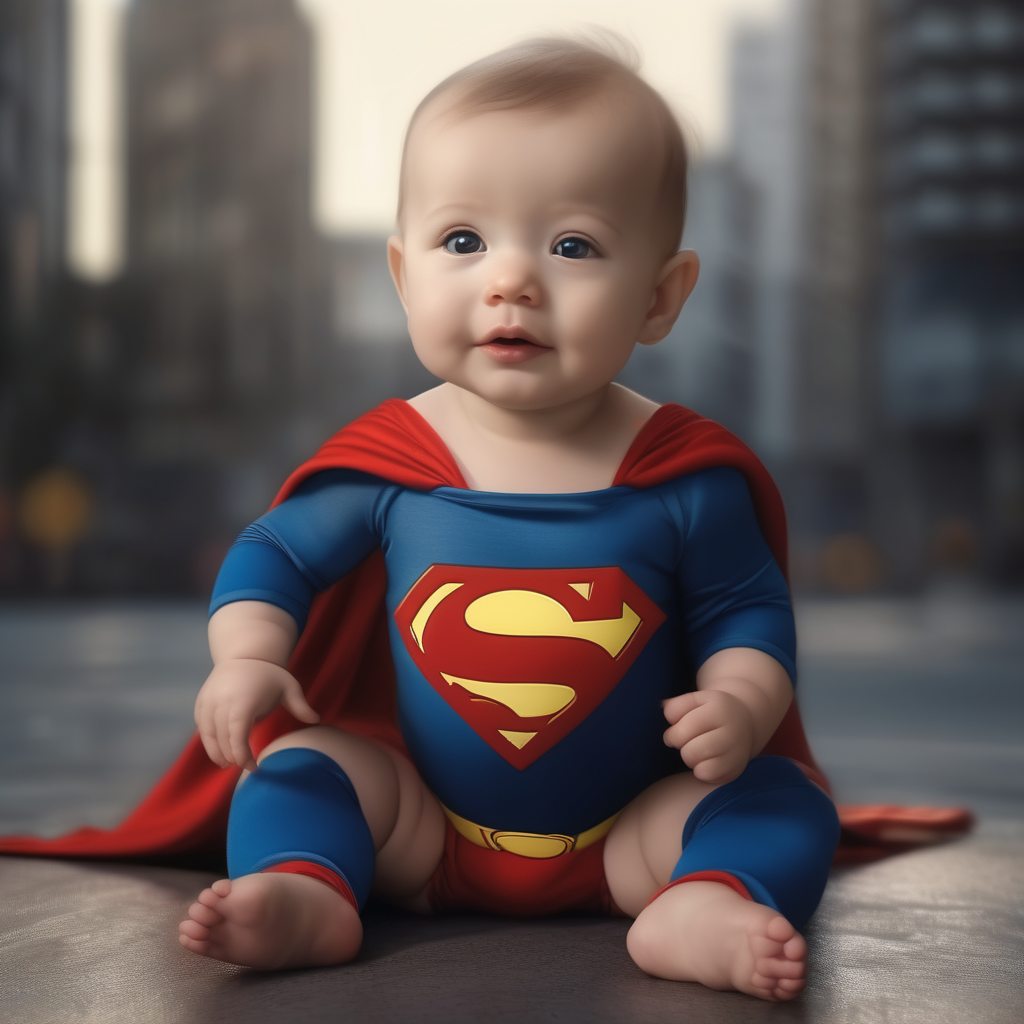

In [ ]:
%%time
generator = torch.Generator(device="cuda").manual_seed(42)
prompt = "baby in superman dress, photorealistic, cinematic"
n_prompt = 'bad, ugly'

image = pipeline(prompt, guidance_scale=7.0, negative_prompt = n_prompt).images[0]
image

In [ ]:
image.size

(1024, 1024)

In [ ]:
from torchinfo import summary
summary(pipeline.unet)

Layer (type:depth-idx)                                                           Param #
UNet2DConditionModel                                                             --
├─Conv2d: 1-1                                                                    11,840
├─Timesteps: 1-2                                                                 --
├─TimestepEmbedding: 1-3                                                         --
│    └─LoRACompatibleLinear: 2-1                                                 410,880
│    └─SiLU: 2-2                                                                 --
│    └─LoRACompatibleLinear: 2-3                                                 1,639,680
├─Timesteps: 1-4                                                                 --
├─TimestepEmbedding: 1-5                                                         --
│    └─LoRACompatibleLinear: 2-4                                                 3,605,760
│    └─SiLU: 2-5                                

In [ ]:
from torch_snippets.trainer.hooks import print_module_ios_for

with print_module_ios_for(pipeline.unet, {'DownBlock2D', 'CrossAttnDownBlock2D', 'CrossAttnUpBlock2D', 'UpBlock2D'}):
  image = pipeline(prompt, num_inference_steps = 1, guidance_scale=0.0, negative_prompt = n_prompt).images[0]

  0%|          | 0/1 [00:00<?, ?it/s]

Module Name: DownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-3.201, 3.354] μ=0.012 σ=0.490 cuda:0 - ID:#cb0945
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e
	2
		0 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-5.355, 4.695] μ=-0.054 σ=0.560 cuda:0 - ID:#2514c8
		1 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-6.680, 5.969] μ=-0.070 σ=0.625 cuda:0 - ID:#3b2aaf
		2 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e



══════════════════════════════════════════════════════════════════

Module Name: DownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-3.201, 3.354] μ=0.012 σ=0.490 cuda:0 - ID:#cb0945
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e
	2
		0 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-5.355, 4.695] μ=-0.054 σ=0.560 cuda:0 - ID:#2514c8
		1 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-6.680, 5.969] μ=-0.070 σ=0.625 cuda:0 - ID:#3b2aaf
		2 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d
	2
		0 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-20.531, 21.422] μ=-0.124 σ=1.786 cuda:0 - ID:#88c11c
		1 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-22.594, 24.531] μ=-0.158 σ=2.527 cuda:0 - ID:#539604
		2 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d
	2
		0 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-20.531, 21.422] μ=-0.124 σ=1.786 cuda:0 - ID:#88c11c
		1 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-22.594, 24.531] μ=-0.158 σ=2.527 cuda:0 - ID:#539604
		2 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.828, 42.875] μ=-0.017 σ=4.875 cuda:0 - ID:#d4eb37
	2
		0 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.203, 45.844] μ=0.003 σ=4.508 cuda:0 - ID:#239b5e
		1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.828, 42.875] μ=-0.017 σ=4.875 cuda:0 - ID:#d4eb37



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.828, 42.875] μ=-0.017 σ=4.875 cuda:0 - ID:#d4eb37
	2
		0 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.203, 45.844] μ=0.003 σ=4.508 cuda:0 - ID:#239b5e
		1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.828, 42.875] μ=-0.017 σ=4.875 cuda:0 - ID:#d4eb37



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-27.594, 29.031] μ=0.113 σ=5.418 cuda:0 - ID:#97b288
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	res_hidden_states_tuple
		0 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d
		1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.203, 45.844] μ=0.003 σ=4.508 cuda:0 - ID:#239b5e
		2 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.828, 42.875] μ=-0.017 σ=4.875 cuda:0 - ID:#d4eb37
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 64, 64] f16 n=5242880 (10Mb) x∈[-58.875, 59.188] μ=-0.384 σ=7.887 cuda:0 - ID:#b83ad5



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-27.594, 29.031] μ=0.113 σ=5.418 cuda:0 - ID:#97b288
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	res_hidden_states_tuple
		0 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-52.938, 45.156] μ=-0.306 σ=6.168 cuda:0 - ID:#61d67d
		1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.203, 45.844] μ=0.003 σ=4.508 cuda:0 - ID:#239b5e
		2 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-30.828, 42.875] μ=-0.017 σ=4.875 cuda:0 - ID:#d4eb37
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 64, 64] f16 n=5242880 (10Mb) x∈[-58.875, 59.188] μ=-0.384 σ=7.887 cuda:0 - ID:#b83ad5



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 64, 64] f16 n=5242880 (10Mb) x∈[-58.875, 59.188] μ=-0.384 σ=7.887 cuda:0 - ID:#b83ad5
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	res_hidden_states_tuple
		0 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e
		1 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-20.531, 21.422] μ=-0.124 σ=1.786 cuda:0 - ID:#88c11c
		2 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-22.594, 24.531] μ=-0.158 σ=2.527 cuda:0 - ID:#539604
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 128, 128] f16 n=10485760 (20Mb) x∈[-30.000, 30.125] μ=-0.009 σ=3.895 cuda:0 - ID:#fef0bd



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 64, 64] f16 n=5242880 (10Mb) x∈[-58.875, 59.188] μ=-0.384 σ=7.887 cuda:0 - ID:#b83ad5
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	res_hidden_states_tuple
		0 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-12.938, 12.250] μ=-0.113 σ=1.738 cuda:0 - ID:#b5419e
		1 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-20.531, 21.422] μ=-0.124 σ=1.786 cuda:0 - ID:#88c11c
		2 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-22.594, 24.531] μ=-0.158 σ=2.527 cuda:0 - ID:#539604
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 128, 128] f16 n=10485760 (20Mb) x∈[-30.000, 30.125] μ=-0.009 σ=3.895 cuda:0 - ID:#fef0bd



══════════════════════════════════════════════════════════════════

Module Name: UpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 128, 128] f16 n=10485760 (20Mb) x∈[-30.000, 30.125] μ=-0.009 σ=3.895 cuda:0 - ID:#fef0bd
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	res_hidden_states_tuple
		0 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-3.201, 3.354] μ=0.012 σ=0.490 cuda:0 - ID:#cb0945
		1 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-5.355, 4.695] μ=-0.054 σ=0.560 cuda:0 - ID:#2514c8
		2 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-6.680, 5.969] μ=-0.070 σ=0.625 cuda:0 - ID:#3b2aaf
	upsample_size - NoneType
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-9.227, 10.594] μ=-0.398 σ=1.409 cuda:0 - ID:#f4ac77



══════════════════════════════════════════════════════════════════

Module Name: UpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 128, 128] f16 n=10485760 (20Mb) x∈[-30.000, 30.125] μ=-0.009 σ=3.895 cuda:0 - ID:#fef0bd
	temb - tensor[1, 1280] f16 2.5Kb x∈[-3.730, 5.266] μ=-0.128 σ=0.469 cuda:0 - ID:#a648de
	res_hidden_states_tuple
		0 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-3.201, 3.354] μ=0.012 σ=0.490 cuda:0 - ID:#cb0945
		1 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-5.355, 4.695] μ=-0.054 σ=0.560 cuda:0 - ID:#2514c8
		2 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-6.680, 5.969] μ=-0.070 σ=0.625 cuda:0 - ID:#3b2aaf
	upsample_size - NoneType
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 128, 128] f16 n=5242880 (10Mb) x∈[-9.227, 10.594] μ=-0.398 σ=1.409 cuda:0 - ID:#f4ac77



══════════════════════════════════════════════════════════════════

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipeline = pipeline.to("cuda")

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 708 ms


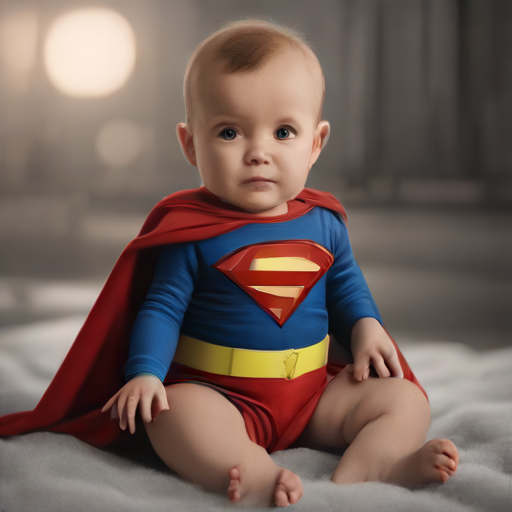

In [ ]:
%%time
prompt = "baby in superman dress, photorealistic, cinematic"
n_prompt = 'bad, ugly, blur, deformed'

image = pipeline(prompt, num_inference_steps = 1, guidance_scale=0.0, negative_prompt = n_prompt, seed = 42).images[0]
image

In [ ]:
from torchinfo import summary
summary(pipeline.unet)

Layer (type:depth-idx)                                                           Param #
UNet2DConditionModel                                                             --
├─Conv2d: 1-1                                                                    11,840
├─Timesteps: 1-2                                                                 --
├─TimestepEmbedding: 1-3                                                         --
│    └─LoRACompatibleLinear: 2-1                                                 410,880
│    └─SiLU: 2-2                                                                 --
│    └─LoRACompatibleLinear: 2-3                                                 1,639,680
├─Timesteps: 1-4                                                                 --
├─TimestepEmbedding: 1-5                                                         --
│    └─LoRACompatibleLinear: 2-4                                                 3,605,760
│    └─SiLU: 2-5                                

In [ ]:
from torch_snippets.trainer.hooks import print_module_ios_for

with print_module_ios_for(pipeline.unet, {'DownBlock2D', 'CrossAttnDownBlock2D', 'CrossAttnUpBlock2D', 'UpBlock2D'}):
  image = pipeline(prompt, num_inference_steps = 1, guidance_scale=0.0, negative_prompt = n_prompt).images[0]


  0%|          | 0/1 [00:00<?, ?it/s]

Module Name: DownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-3.047, 2.814] μ=0.013 σ=0.487 cuda:0 - ID:#b8082c
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016
	2
		0 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.641, 3.340] μ=-0.052 σ=0.520 cuda:0 - ID:#5d7bbd
		1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.828, 3.443] μ=-0.019 σ=0.360 cuda:0 - ID:#44539a
		2 - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016



══════════════════════════════════════════════════════════════════

Module Name: DownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-3.047, 2.814] μ=0.013 σ=0.487 cuda:0 - ID:#b8082c
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016
	2
		0 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.641, 3.340] μ=-0.052 σ=0.520 cuda:0 - ID:#5d7bbd
		1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.828, 3.443] μ=-0.019 σ=0.360 cuda:0 - ID:#44539a
		2 - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e
	2
		0 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-12.344, 11.156] μ=-0.138 σ=1.072 cuda:0 - ID:#3a1eee
		1 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-11.195, 11.609] μ=0.002 σ=0.847 cuda:0 - ID:#a98c54
		2 - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e
	2
		0 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-12.344, 11.156] μ=-0.138 σ=1.072 cuda:0 - ID:#3a1eee
		1 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-11.195, 11.609] μ=0.002 σ=0.847 cuda:0 - ID:#a98c54
		2 - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-37.344, 22.078] μ=-0.201 σ=4.145 cuda:0 - ID:#a8a617
	2
		0 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-30.250, 24.188] μ=-0.071 σ=2.514 cuda:0 - ID:#067eda
		1 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-37.344, 22.078] μ=-0.201 σ=4.145 cuda:0 - ID:#a8a617



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnDownBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	attention_mask - NoneType
	cross_attention_kwargs - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-37.344, 22.078] μ=-0.201 σ=4.145 cuda:0 - ID:#a8a617
	2
		0 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-30.250, 24.188] μ=-0.071 σ=2.514 cuda:0 - ID:#067eda
		1 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-37.344, 22.078] μ=-0.201 σ=4.145 cuda:0 - ID:#a8a617



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-29.000, 37.125] μ=0.108 σ=4.848 cuda:0 - ID:#11110c
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	res_hidden_states_tuple
		0 - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e
		1 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-30.250, 24.188] μ=-0.071 σ=2.514 cuda:0 - ID:#067eda
		2 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-37.344, 22.078] μ=-0.201 σ=4.145 cuda:0 - ID:#a8a617
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-120.062, 81.188] μ=0.038 σ=8.516 cuda:0 - ID:#1a7382



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-29.000, 37.125] μ=0.108 σ=4.848 cuda:0 - ID:#11110c
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	res_hidden_states_tuple
		0 - tensor[1, 640, 16, 16] f16 n=163840 (0.3Mb) x∈[-20.750, 20.000] μ=0.102 σ=1.942 cuda:0 - ID:#02c02e
		1 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-30.250, 24.188] μ=-0.071 σ=2.514 cuda:0 - ID:#067eda
		2 - tensor[1, 1280, 16, 16] f16 n=327680 (0.6Mb) x∈[-37.344, 22.078] μ=-0.201 σ=4.145 cuda:0 - ID:#a8a617
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-120.062, 81.188] μ=0.038 σ=8.516 cuda:0 - ID:#1a7382



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-120.062, 81.188] μ=0.038 σ=8.516 cuda:0 - ID:#1a7382
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	res_hidden_states_tuple
		0 - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016
		1 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-12.344, 11.156] μ=-0.138 σ=1.072 cuda:0 - ID:#3a1eee
		2 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-11.195, 11.609] μ=0.002 σ=0.847 cuda:0 - ID:#a98c54
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-31.656, 29.203] μ=-0.145 σ=1.924 cuda:0 - ID:#ff78d5



══════════════════════════════════════════════════════════════════

Module Name: CrossAttnUpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 1280, 32, 32] f16 n=1310720 (2.5Mb) x∈[-120.062, 81.188] μ=0.038 σ=8.516 cuda:0 - ID:#1a7382
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	res_hidden_states_tuple
		0 - tensor[1, 320, 32, 32] f16 n=327680 (0.6Mb) x∈[-6.617, 6.082] μ=-0.012 σ=0.891 cuda:0 - ID:#1b7016
		1 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-12.344, 11.156] μ=-0.138 σ=1.072 cuda:0 - ID:#3a1eee
		2 - tensor[1, 640, 32, 32] f16 n=655360 (1.2Mb) x∈[-11.195, 11.609] μ=0.002 σ=0.847 cuda:0 - ID:#a98c54
	encoder_hidden_states - tensor[1, 77, 2048] f16 n=157696 (0.3Mb) x∈[-809.000, 854.500] μ=0.020 σ=3.076 cuda:0 - ID:#1dfc16
	cross_attention_kwargs - NoneType
	upsample_size - NoneType
	attention_mask - NoneType
	encoder_attention_mask - NoneType

Input Args:

Outputs: 
	1 - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-31.656, 29.203] μ=-0.145 σ=1.924 cuda:0 - ID:#ff78d5



══════════════════════════════════════════════════════════════════

Module Name: UpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-31.656, 29.203] μ=-0.145 σ=1.924 cuda:0 - ID:#ff78d5
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	res_hidden_states_tuple
		0 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-3.047, 2.814] μ=0.013 σ=0.487 cuda:0 - ID:#b8082c
		1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.641, 3.340] μ=-0.052 σ=0.520 cuda:0 - ID:#5d7bbd
		2 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.828, 3.443] μ=-0.019 σ=0.360 cuda:0 - ID:#44539a
	upsample_size - NoneType
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-17.125, 11.547] μ=-0.961 σ=3.209 cuda:0 - ID:#fb9b3d



══════════════════════════════════════════════════════════════════

Module Name: UpBlock2D
Input Kwargs: 
	hidden_states - tensor[1, 640, 64, 64] f16 n=2621440 (5Mb) x∈[-31.656, 29.203] μ=-0.145 σ=1.924 cuda:0 - ID:#ff78d5
	temb - tensor[1, 1280] f16 2.5Kb x∈[-2.918, 7.727] μ=0.021 σ=0.677 cuda:0 - ID:#2a27f0
	res_hidden_states_tuple
		0 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-3.047, 2.814] μ=0.013 σ=0.487 cuda:0 - ID:#b8082c
		1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.641, 3.340] μ=-0.052 σ=0.520 cuda:0 - ID:#5d7bbd
		2 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-4.828, 3.443] μ=-0.019 σ=0.360 cuda:0 - ID:#44539a
	upsample_size - NoneType
	scale - 1.0 (float)

Input Args:

Outputs: 
	1 - tensor[1, 320, 64, 64] f16 n=1310720 (2.5Mb) x∈[-17.125, 11.547] μ=-0.961 σ=3.209 cuda:0 - ID:#fb9b3d



══════════════════════════════════════════════════════════════════